In [1]:
import numpy as np

In [2]:
from wavelet import wavelet

In [3]:
wav = wavelet(os.path.abspath(os.getcwd()))
wav.wavelet()

In [4]:
X,y = wav.X,np.asarray(wav.Y)

In [5]:
X.shape

(170, 4096)

In [6]:
y.shape

(170,)

In [7]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)

In [9]:
print(X_train.shape,X_test.shape)

(127, 4096) (43, 4096)


In [17]:
pipe = Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel = 'rbf' , C = 10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.8604651162790697

In [11]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73        10
           1       0.80      0.80      0.80        10
           2       1.00      0.85      0.92        13
           3       1.00      1.00      1.00        10

    accuracy                           0.86        43
   macro avg       0.87      0.86      0.86        43
weighted avg       0.88      0.86      0.86        43



In [12]:
wav.dar

{'ben_afflek': 0, 'jerry_seinfeld': 1, 'madonna': 2, 'mindy_kaling': 3}

In [13]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [23]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [24]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.763692,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.654769,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.788000,{'logisticregression__C': 1}


In [27]:
best_estimators['svm'].score(X_test,y_test)

0.9069767441860465

In [28]:
best_estimators['random_forest'].score(X_test,y_test)

0.6744186046511628

In [30]:
best_estimators['logistic_regression'].score(X_test,y_test)
best_model = best_estimators['logistic_regression']

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,best_model.predict(X_test))


Text(69.0, 0.5, 'Actual')

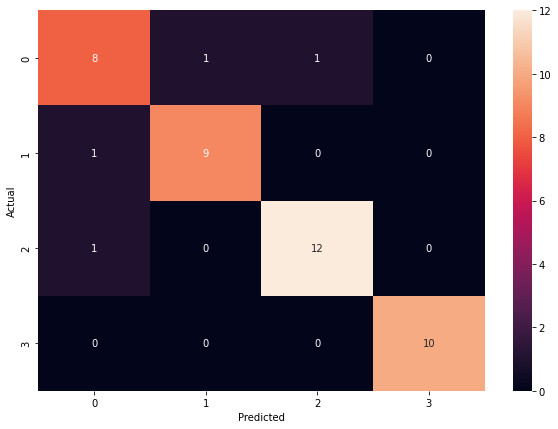

In [36]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [37]:
#!pip install joblib
import joblib
joblib.dump(best_model,'saved_model.pkl')
 

['saved_model.pkl']

#Save class dictionary

In [39]:
import json 
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(wav.dar))